## Outlines:

- 1. Data Observation


- 2. Exploratory Data Analysis and Data Cleaning
    - 2.1 Missing Values
    - 2.2 Data Visualizaton and Cleaning
        - Outliers
        - Normalization
        - Correlation
    - 2.2 Feature Engineering
        
  
- 3 Model Preparation
    - 3.1 Encoding
    - 3.2 Scaling
    - 3.3 Split Training and Testing
    
 
 
- Models Tuning / Evaluation Metrics
    - Regression Algorithms
    - RMSE / MAE / MSE

## 1. Data Observation

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Raw_Housing_Prices.csv')

In [4]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We see an <b> ID </b> which is not necessary as all the dataframe comes with default indexes. We will drop the ID column.

In [7]:
df.shape

(21613, 21)

In [8]:
categorical_df = df.select_dtypes(include = 'object')
numerical_df = df.select_dtypes(exclude = 'object')

In [9]:
len(df.columns)

21

In [10]:
print(len(categorical_df.columns) + len(numerical_df.columns))

21




# 2. Exploratory Data Analysis

We will perform exploratory data analysis on each attributes. And based on the observation we will clean the dataset. But before this, we want to impute missing values.


In [11]:
xdf = df.copy()

## 2.1 Impute Missing Values

In [12]:
xdf.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### a. SalePrice

In [13]:
xdf['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

We know this has outliers so we will be using median for impute the missing values

In [14]:
xdf['Sale Price'] = xdf['Sale Price'].fillna(xdf['Sale Price'].median())

In [15]:
xdf.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### b. Number of Bathrooms
There are 4 datas missing here

In [16]:
xdf['No of Bathrooms'].values

array([1.  , 2.25, 1.  , ..., 0.75, 2.5 , 0.75])

In [17]:
null_data = xdf[xdf.isnull().any(axis = 1)]

In [18]:
null_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
226,8682281200,15 March 2016,479950.0,2,2.00,1510.0,NaN,1.0,No,None,...,8,1510.0,0,13,0,98053.0,47.7076,-122.013,1640.0,6009
249,3797001895,15 April 2016,481000.0,3,1.75,NaN,3000.0,1.0,No,None,...,6,770.0,790,100,0,98103.0,47.6846,-122.345,1390.0,3000
275,4215100060,15 March 2016,365000.0,3,2.50,NaN,4510.0,2.0,No,None,...,8,2653.0,0,12,0,98031.0,47.4145,-122.166,2653.0,4927
296,5468730030,14 August 2017,265000.0,3,2.00,NaN,8959.0,1.0,No,None,...,7,1320.0,0,25,0,98042.0,47.3536,-122.144,1740.0,7316
321,2597650240,14 October 2017,520000.0,3,NaN,2030.0,16200.0,2.0,No,None,...,8,2030.0,0,34,0,98027.0,47.5162,-122.057,2660.0,17958
352,616000140,15 January 2016,315000.0,3,NaN,1900.0,14400.0,1.0,No,None,...,7,1300.0,600,64,0,98166.0,47.4147,-122.337,1940.0,14400
372,2231500030,15 March 2016,530000.0,4,2.25,NaN,10754.0,1.0,No,None,...,7,1100.0,1080,64,0,98133.0,47.7711,-122.341,1810.0,6929
402,6021501685,15 April 2016,352000.0,2,1.00,940.0,NaN,1.0,No,None,...,7,940.0,0,81,0,98117.0,47.6879,-122.385,1560.0,4500
438,9528102772,14 July 2017,438000.0,2,2.00,1270.0,NaN,3.0,No,None,...,8,1270.0,0,18,0,98115.0,47.6776,-122.318,1610.0,3090
449,4140090240,14 November 2017,520000.0,3,2.25,2590.0,9263.0,1.0,No,None,...,8,NaN,1150,41,0,98028.0,47.7691,-122.262,2580.0,9450


In [19]:
xdf['No of Bathrooms'].describe()

count    21609.000000
mean         2.114732
std          0.770138
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: No of Bathrooms, dtype: float64

We will replace missing for `No of Bathrooms` with median, since it also contains outliers

In [20]:
xdf['No of Bathrooms'] = xdf['No of Bathrooms'].fillna(xdf['No of Bathrooms'].median())

In [21]:
xdf.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### c. Flat Area (in Sqft)

In [22]:
xdf['Flat Area (in Sqft)'].describe()

count    21604.000000
mean      2079.931772
std        918.487597
min        290.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: Flat Area (in Sqft), dtype: float64

In [23]:
xdf['Flat Area (in Sqft)'] = xdf['Flat Area (in Sqft)'].fillna(xdf['Flat Area (in Sqft)'].median())

### d. Lot Area (in Sqft)

In [24]:
xdf['Lot Area (in Sqft)'] = xdf['Lot Area (in Sqft)'].fillna(xdf['Lot Area (in Sqft)'].median())

### e. Area of the House from Basement (in Sqft)


In [25]:
xdf['Area of the House from Basement (in Sqft)'].describe()

count    21610.000000
mean      1788.344193
std        827.982604
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: Area of the House from Basement (in Sqft), dtype: float64

### f. Area of the House from Basement

In [26]:
xdf['Area of the House from Basement (in Sqft)'] = xdf['Area of the House from Basement (in Sqft)'].fillna(xdf['Area of the House from Basement (in Sqft)'].median())

### g. Zipcode 

In [27]:
xdf['Zipcode'].describe()

count    21612.000000
mean     98077.937766
std         53.505425
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: Zipcode, dtype: float64

In [28]:
xdf['Zipcode'] = xdf['Zipcode'].fillna(xdf['Zipcode'].mean())

### h. Latitude and Longitude

In [29]:
xdf['Latitude'].describe()

count    21612.000000
mean        47.560048
std          0.138565
min         47.155900
25%         47.470975
50%         47.571800
75%         47.678000
max         47.777600
Name: Latitude, dtype: float64

In [30]:
xdf['Latitude'] = xdf['Latitude'].fillna(xdf['Latitude'].mean())
xdf['Longitude'] = xdf['Longitude'].fillna(xdf['Longitude'].mean())
xdf['Living Area after Renovation (in Sqft)'] = xdf['Living Area after Renovation (in Sqft)'].fillna(xdf['Living Area after Renovation (in Sqft)'].median())

In [31]:
xdf.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [32]:
xxdf = xdf.copy()

## 2.2 Data Visualization and Cleaning

### a. Sale Price

In [33]:
xxdf['Sale Price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64

In [34]:
## Checking the distribution of the Sales Price

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

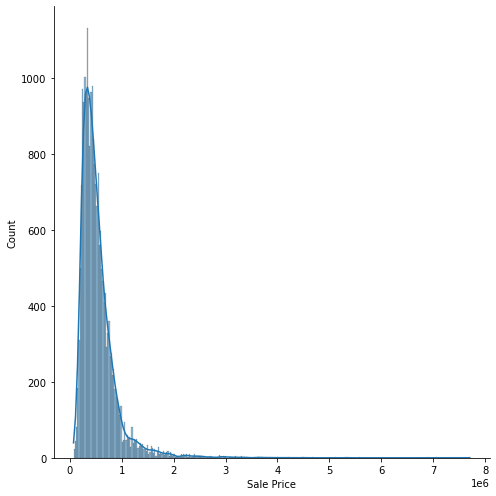

In [36]:
sns.displot(x ='Sale Price', data = xxdf, aspect =1 , height = 7, kde = True);

- This data is <b> Positively skewed </b>, every <b> Positive skewed </b> data, has to be transformed with <b> nth root </b> or <b> log(x) </b>
- However, for <b> Negative Skewed </b> data, we should transform it by <b> nth power </b> or <b> exponential </b>

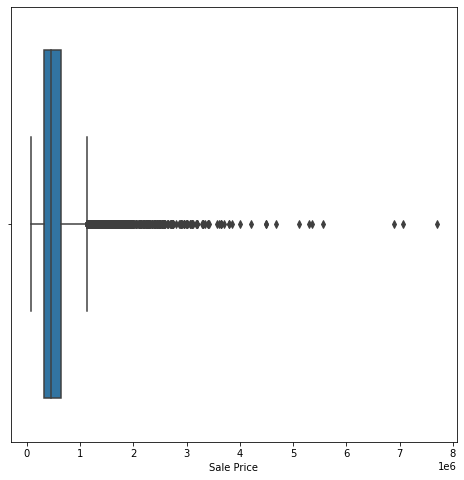

In [37]:
## Let's check the outlier 

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Sale Price', data = xxdf);

In [38]:
import numpy as np

In [39]:
df.shape

(21613, 21)

In [40]:
xxdf.shape

(21613, 21)

In [41]:
## Function to remove outliers

def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    df_no_outlier = dataframe[(dataframe[column] < max ) & (dataframe[column] > min)]
    
    return df_no_outlier

In [42]:
xxdf = remove_outliers(xxdf, "Sale Price")

In [43]:
xxdf.shape

(20454, 21)

In [44]:
xxdf['Sale Price'].describe()

count    2.045400e+04
mean     4.765908e+05
std      2.078381e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.374500e+05
75%      6.000000e+05
max      1.120000e+06
Name: Sale Price, dtype: float64

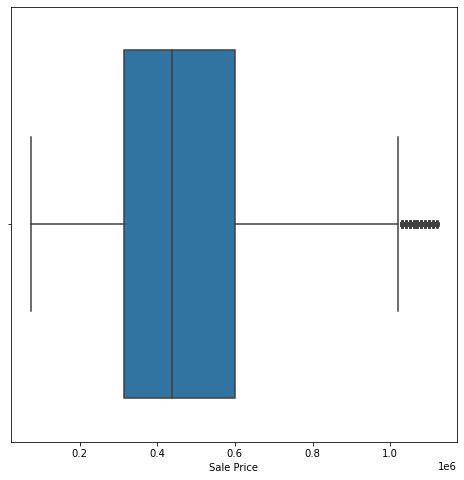

In [45]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Sale Price', data = xxdf);

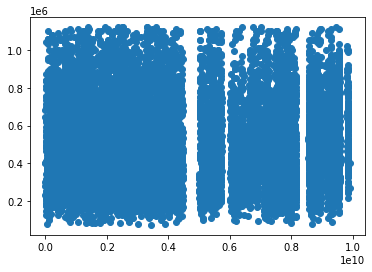

In [46]:
##

plt.scatter(x = xxdf['ID'], y = xxdf['Sale Price'])

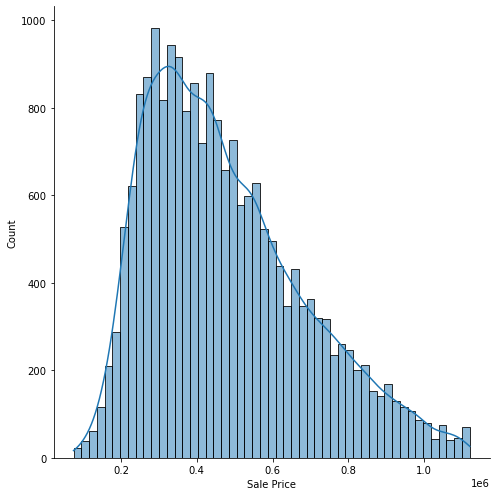

In [47]:
## Let's check the distriubtion of the Sale Price
sns.displot(x ='Sale Price', data = xxdf, aspect =1 , height = 7, kde = True);

### b. No of Bedrooms

In [48]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [49]:
xxdf['No of Bedrooms'].value_counts()

3     9597
4     6304
2     2736
5     1335
6      225
1      198
7       30
0       12
8        9
9        4
10       2
11       1
33       1
Name: No of Bedrooms, dtype: int64

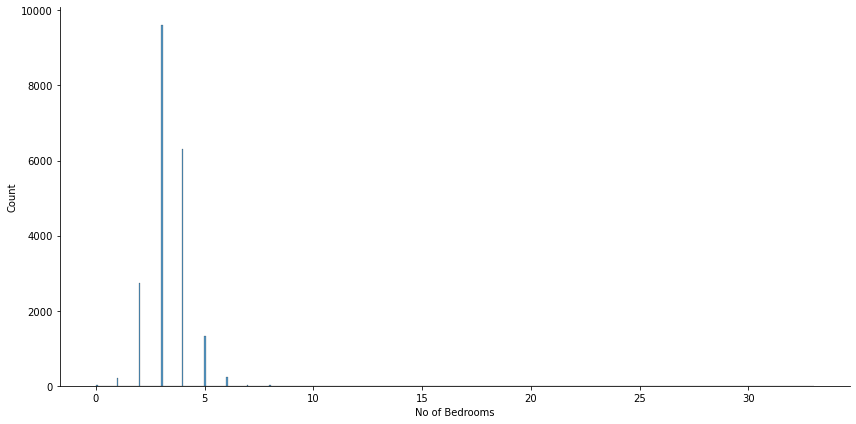

In [50]:
## plotting it's distribution

sns.displot(x = 'No of Bedrooms', data = xxdf, aspect = 2, height = 6);

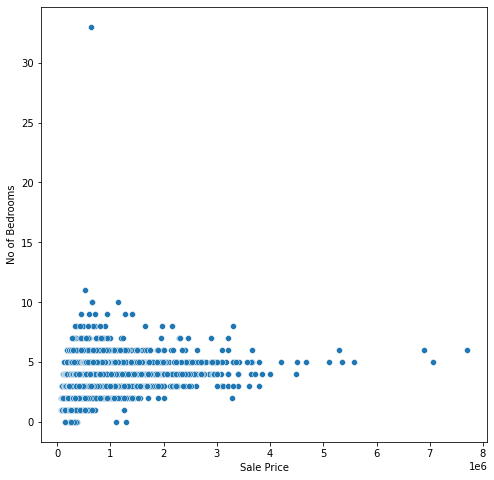

In [51]:
## let's see price according to No of Bedrooms

plt.figure(figsize = (8,8))
sns.scatterplot(y = 'No of Bedrooms', x = "Sale Price", data = xdf);

We have, some unnrealted data, like 33 bedrooms or 10 Bedrooms or 0 Bedrooms. We will remove this rows.

In [52]:
xxdf = xxdf.loc[(xxdf['No of Bedrooms'] != 33) & 
                (xxdf['No of Bedrooms'] != 11) &
               (xxdf['No of Bedrooms'] != 10) &
               (xxdf['No of Bedrooms'] != 9) &
               (xxdf['No of Bedrooms'] != 8) &
               (xxdf['No of Bedrooms'] != 0)]

In [53]:
xxdf['No of Bedrooms'].value_counts()

3    9597
4    6304
2    2736
5    1335
6     225
1     198
7      30
Name: No of Bedrooms, dtype: int64

In [54]:
xdf['No of Bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: No of Bedrooms, dtype: int64

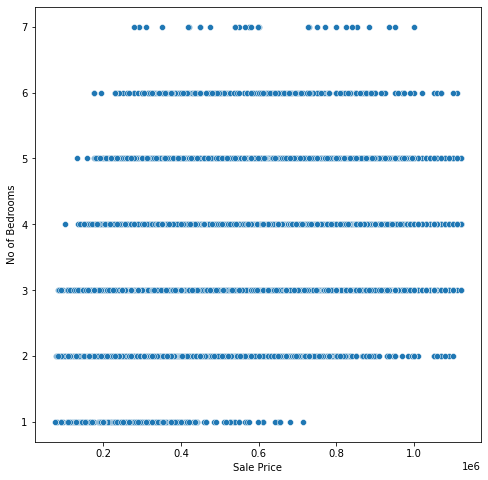

In [55]:
# Let's visualize after dropping

plt.figure(figsize = (8,8))
sns.scatterplot(y = 'No of Bedrooms', x = "Sale Price", data = xxdf);

In [56]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### c. No of Bathrooms

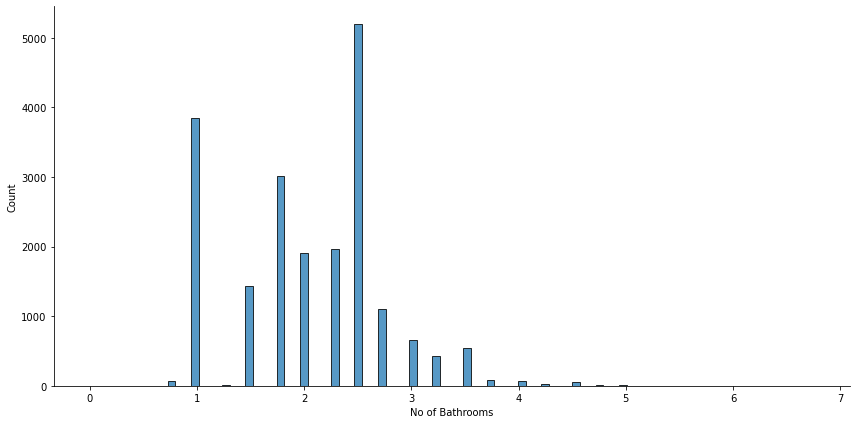

In [57]:
sns.displot(x = 'No of Bathrooms', data = xxdf, aspect = 2, height = 6);

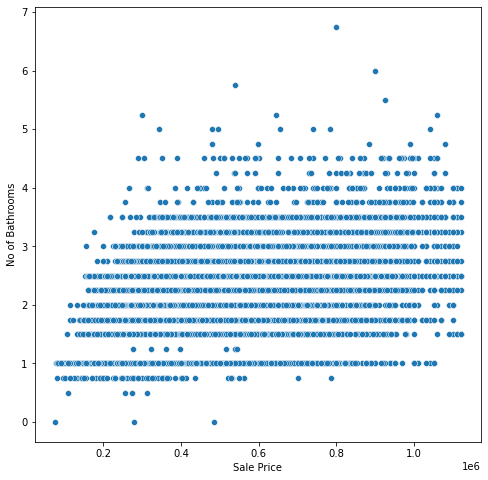

In [58]:
## let's see price according to No of bathrooms

plt.figure(figsize = (8,8))
sns.scatterplot(y = 'No of Bathrooms', x = "Sale Price", data = xxdf);

### c. Flat Area (in Sqft)

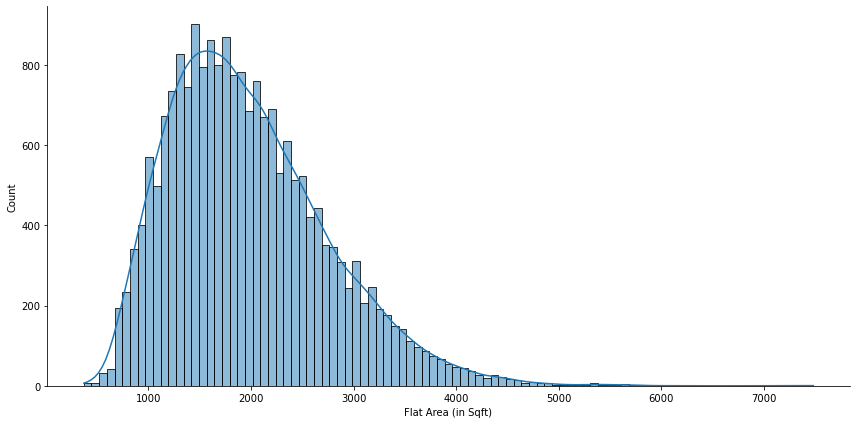

In [59]:
sns.displot(x = 'Flat Area (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

This seems perfect distirubtion but it consists some amount of outliers. Lets' confirm in outliers in Boxplot

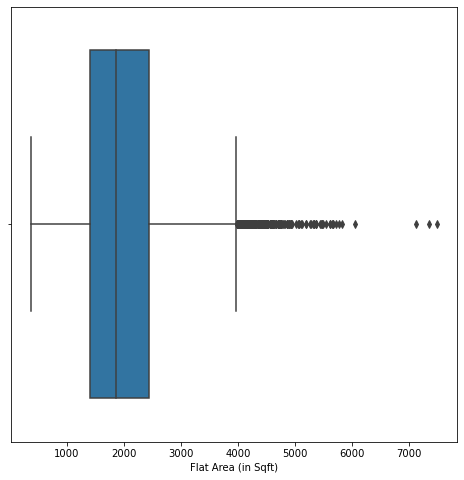

In [60]:
## Boxplot

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Flat Area (in Sqft)', data = xxdf);

<b>Let's remove the outliers

In [61]:
xxdf = remove_outliers(xxdf, 'Flat Area (in Sqft)')

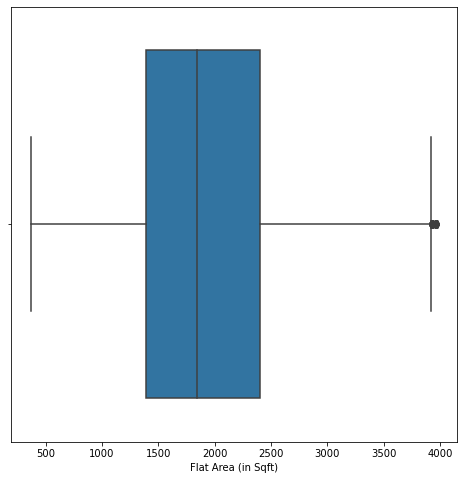

In [62]:
# After Removing Outliers

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Flat Area (in Sqft)', data = xxdf);

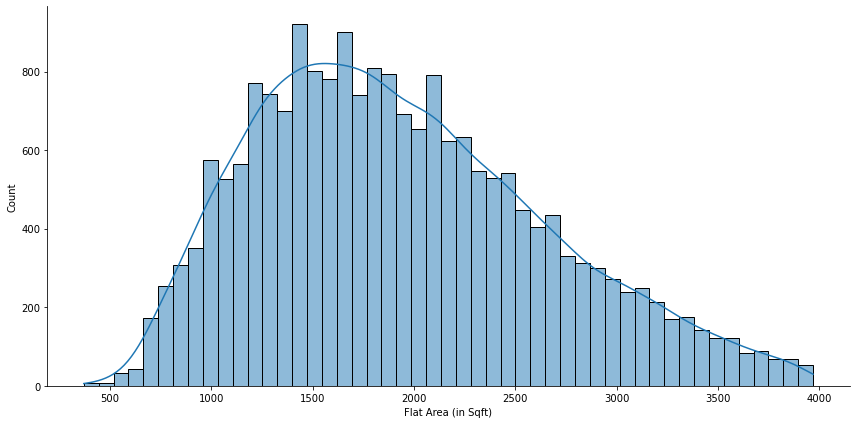

In [63]:
sns.displot(x = 'Flat Area (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

In [64]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### e. Lot Area (in Sqft)

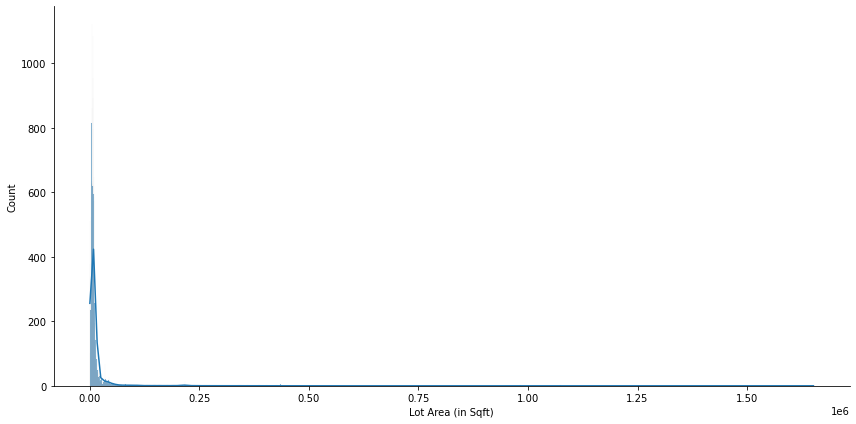

In [65]:
# Checking it's distribution plot

sns.displot(x = 'Lot Area (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

It contains huge number of outliers. Let's remove it

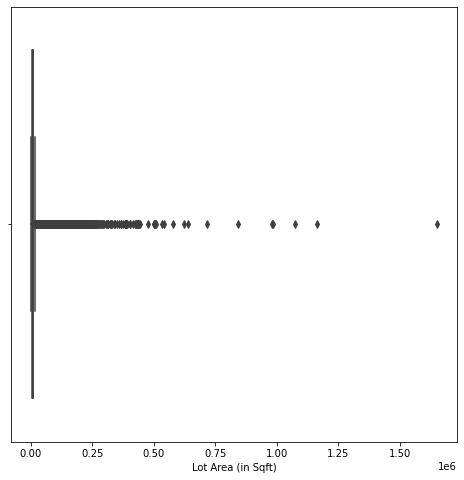

In [66]:
# 
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Lot Area (in Sqft)', data = xxdf);

In [67]:
cxdf = remove_outliers(xxdf, 'Lot Area (in Sqft)')

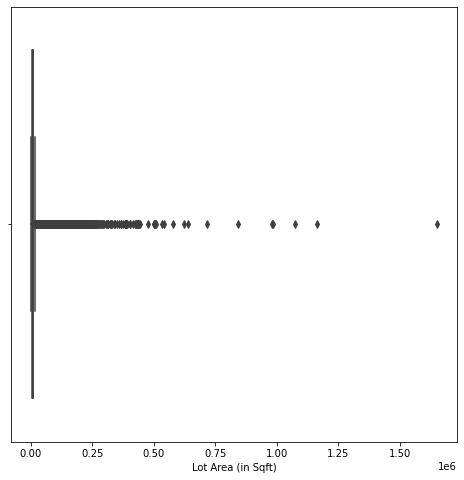

In [68]:
# After removing oultiers

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Lot Area (in Sqft)', data = xxdf);

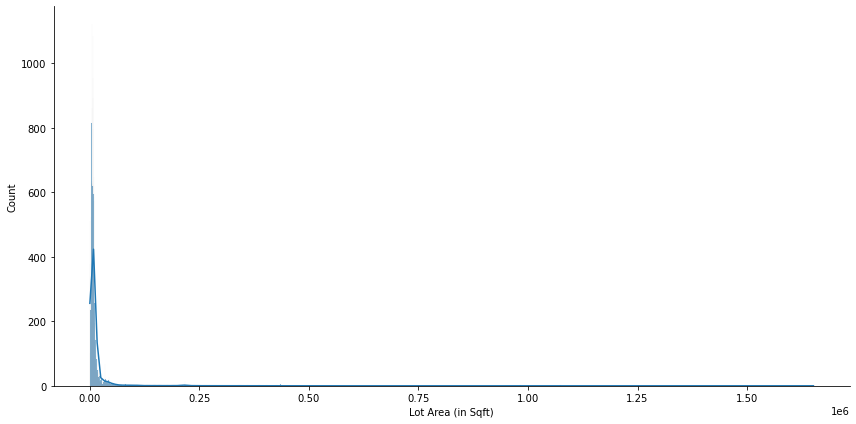

In [69]:
## And it's distribution
# Checking it's distribution again

sns.displot(x = 'Lot Area (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

It's alright.

In [70]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### f. No of Floors

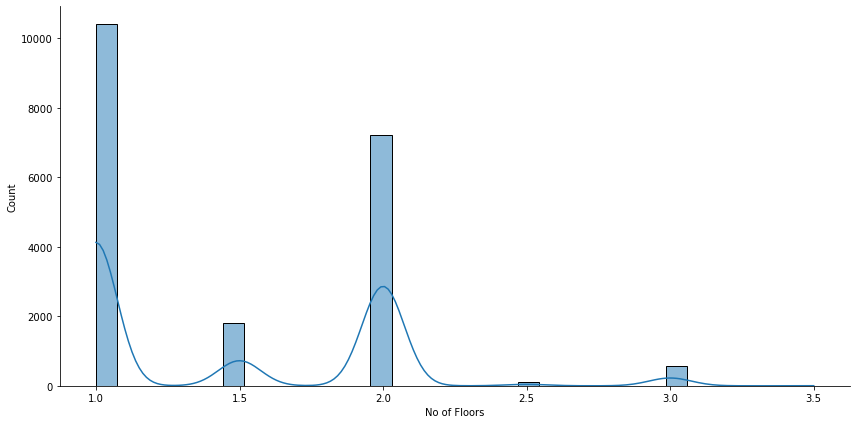

In [71]:
sns.displot(x = 'No of Floors', data = xxdf, aspect = 2, height = 6, kde = True);

Since this is a categorical type of data, let's see the presence with Price.

In [72]:
xxdf['No of Floors'].value_counts()

1.0    10400
2.0     7214
1.5     1820
3.0      565
2.5      104
3.5        6
Name: No of Floors, dtype: int64

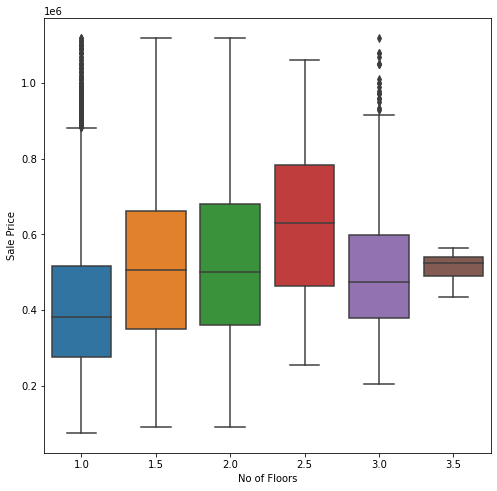

In [73]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'No of Floors', y = "Sale Price", data = xxdf);

### g. Overall Grade`

In [74]:
xxdf['Overall Grade'].value_counts()

7     8940
8     5912
9     2221
6     2037
10     727
5      242
4       27
3        3
Name: Overall Grade, dtype: int64

This is Nomial data type, let's see the grade of a dataset with respect to price.

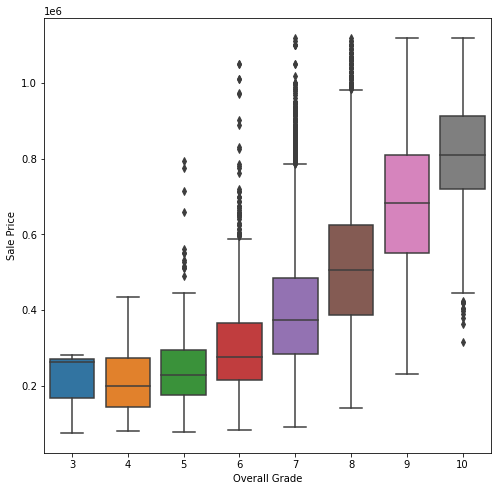

In [75]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Overall Grade', y = "Sale Price", data = xxdf);

### h. Area of the House from Basement (in Sqft)

In [76]:
xxdf['Area of the House from Basement (in Sqft)'].value_counts()

1300.0    212
1010.0    210
1200.0    206
1220.0    192
1140.0    184
         ... 
1867.0      1
1834.0      1
3135.0      1
1946.0      1
1008.0      1
Name: Area of the House from Basement (in Sqft), Length: 756, dtype: int64

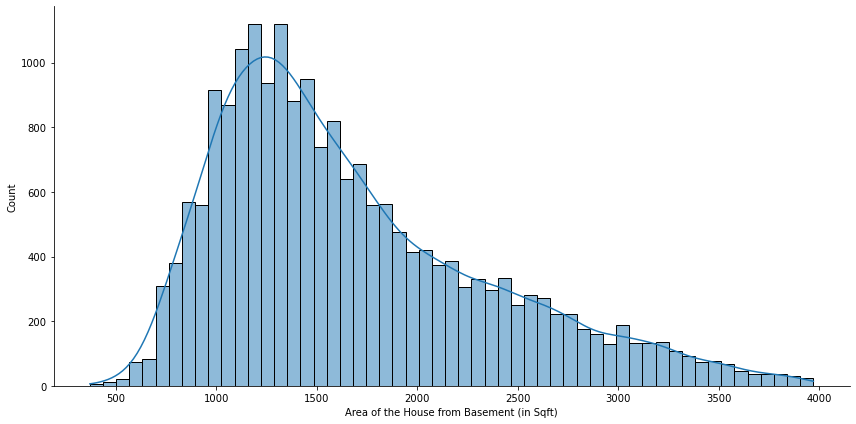

In [77]:
sns.displot(x = 'Area of the House from Basement (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

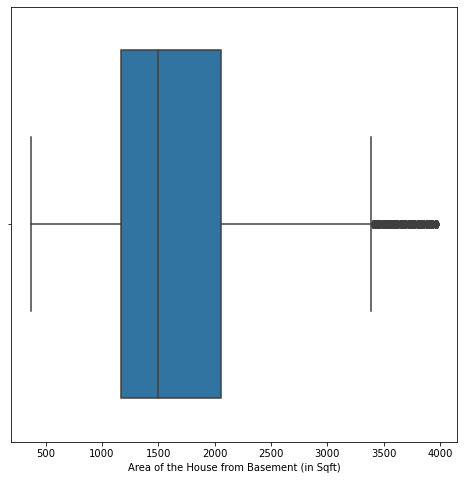

In [78]:
## Boxplot

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Area of the House from Basement (in Sqft)', data = xxdf);

It contains, some amount of outliers. Let's remove it.

In [79]:
xxdf = remove_outliers(xxdf, 'Area of the House from Basement (in Sqft)')

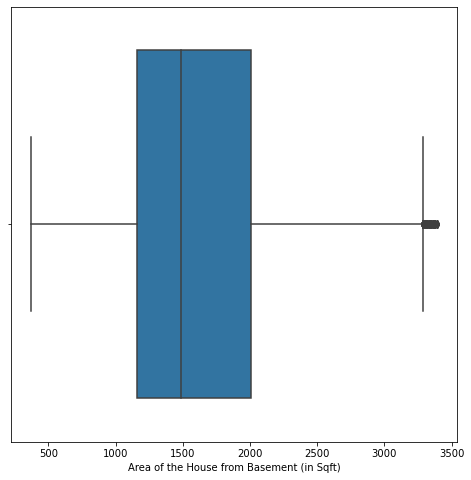

In [80]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Area of the House from Basement (in Sqft)', data = xxdf);

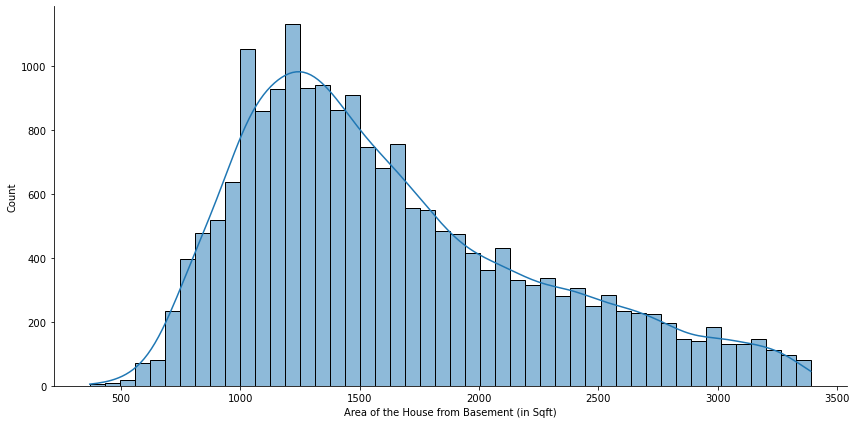

In [81]:
sns.displot(x = 'Area of the House from Basement (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

In [82]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### i. Basement Area (in Sqft)

In [83]:
xxdf['Basement Area (in Sqft)'].value_counts()

0       12118
600       212
500       209
700       202
800       191
        ...  
274         1
283         1
475         1
875         1
1135        1
Name: Basement Area (in Sqft), Length: 239, dtype: int64

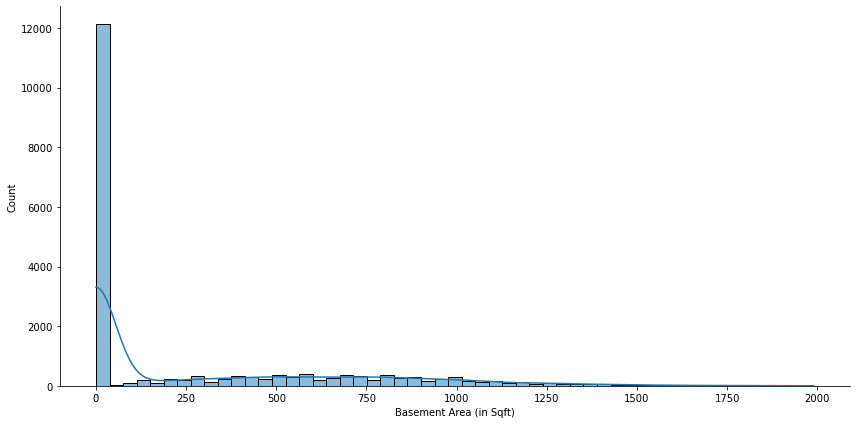

In [84]:
sns.displot(x = 'Basement Area (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

Basement is the space built below or partly below the ground level. A majority of the houses doesn't include basement area. Logically, a normal house doesn't have a basement area, that's why a majority of the dataset contains 0 basement i.e 10089 houses.

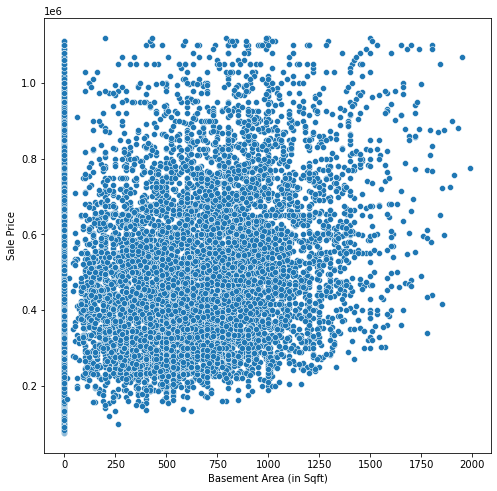

In [85]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Basement Area (in Sqft)', y = "Sale Price", data = xxdf);

Yes, the price of house indeed increases the more Basement Area it has.

In [86]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### j. Age of House (in Years)

In [87]:
xxdf['Age of House (in Years)'].value_counts()

4      463
41     397
13     388
14     369
40     369
      ... 
117     27
116     23
85      22
83      21
84      19
Name: Age of House (in Years), Length: 116, dtype: int64

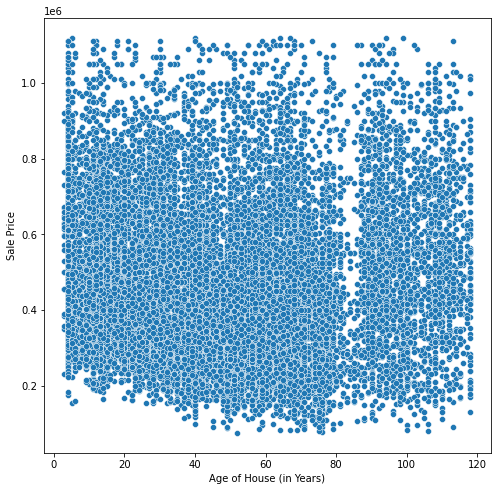

In [88]:
# Scatterplot
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Age of House (in Years)', y = "Sale Price", data = xxdf);

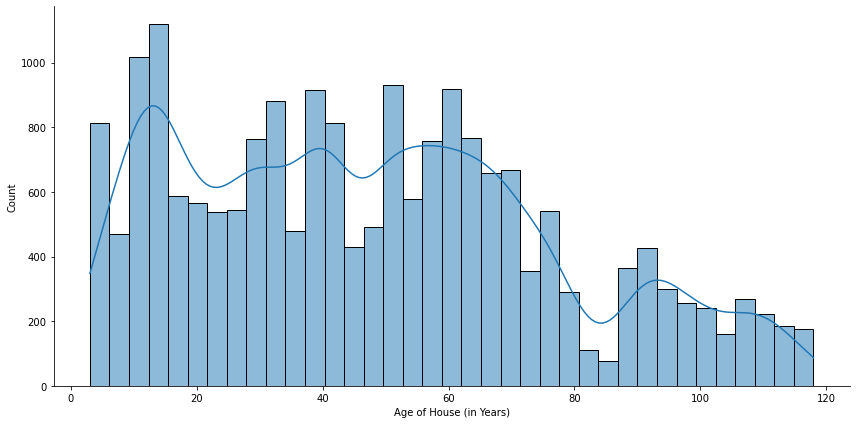

In [89]:
## 
sns.displot(x = 'Age of House (in Years)', data = xxdf, aspect = 2, height = 6, kde = True);

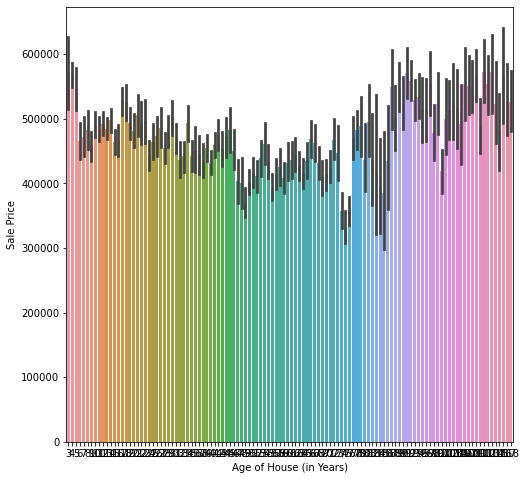

In [90]:
#
plt.figure(figsize = (8,8))
sns.barplot(x = 'Age of House (in Years)', y = "Sale Price", data = xxdf);

Old houses more than 80 years, also falls on the expensive house list. Interesting

### k. Renovated Year

In [91]:
xxdf['Renovated Year'].value_counts()

0       18943
2014       80
2013       33
2007       29
2000       28
        ...  
1948        1
1944        1
1954        1
1956        1
1951        1
Name: Renovated Year, Length: 70, dtype: int64

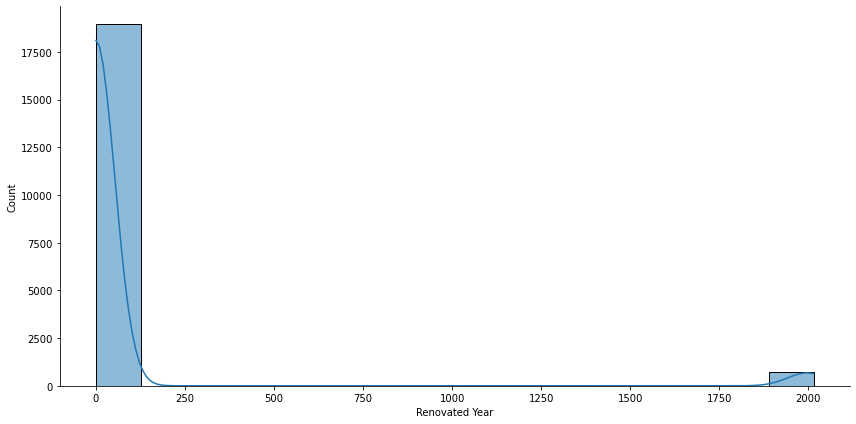

In [92]:
sns.displot(x = 'Renovated Year', data = xxdf, aspect = 2, height = 6, kde = True);

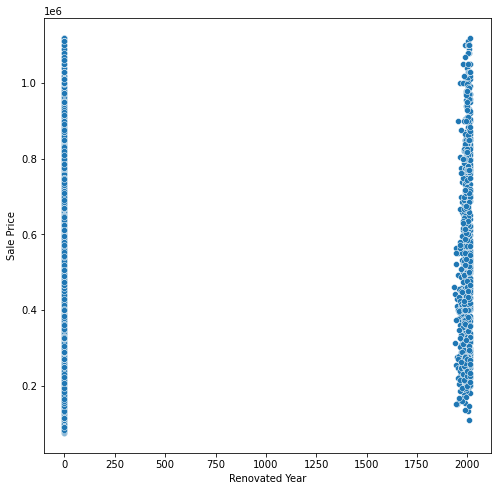

In [93]:
# Scatterplot
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Renovated Year', y = "Sale Price", data = xxdf);

### l. Zipcode


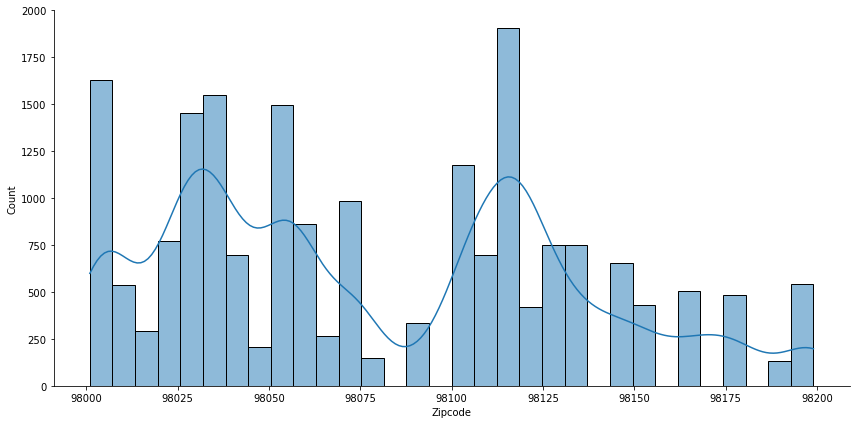

In [94]:
sns.displot(x = 'Zipcode', data = xxdf, aspect = 2, height = 6, kde = True);

Zipcode ususally, doesn't indicates the price of a house. In a same zipcode the one house price can be expensive wherease other can be cheap. So we will drop the column

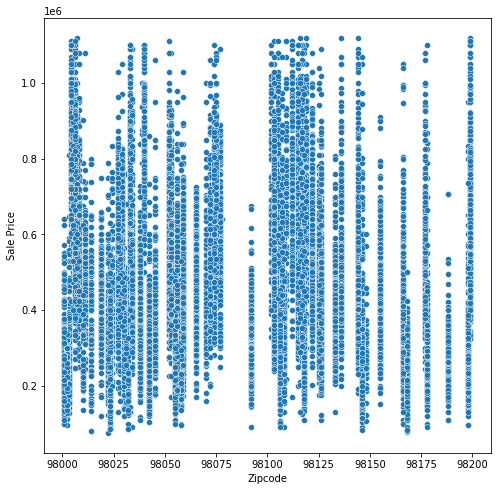

In [95]:
# Scatterplot
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Zipcode', y = "Sale Price", data = xxdf);

In [96]:
xxdf.drop('Zipcode', axis = 1, inplace = True)

In [97]:
xxdf.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [98]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### m. Latitude and Longtiude

In [99]:
xxdf['Latitude'].value_counts()

47.5322    17
47.6955    16
47.6711    16
47.6886    15
47.6904    15
           ..
47.2058     1
47.4736     1
47.4317     1
47.3183     1
47.2715     1
Name: Latitude, Length: 4974, dtype: int64

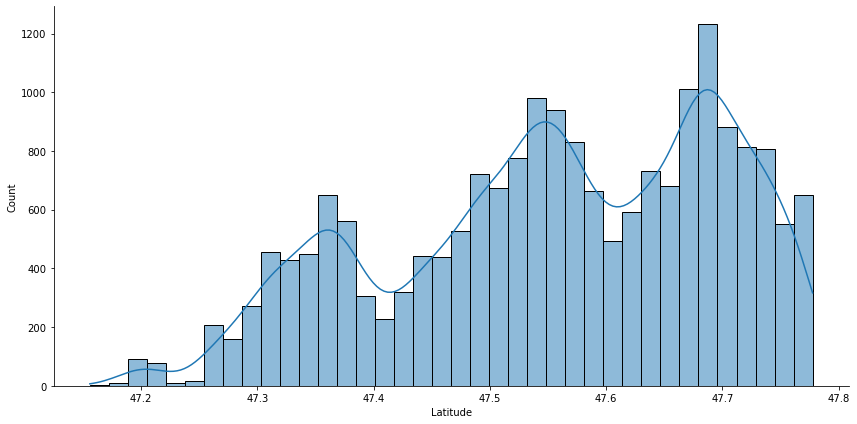

In [100]:
sns.displot(x = 'Latitude', data = xxdf, aspect = 2, height = 6, kde = True);

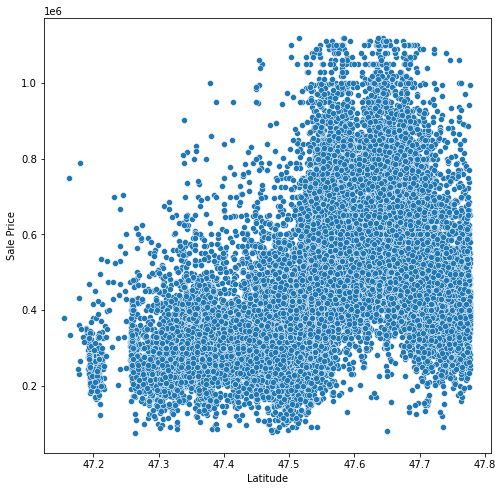

In [101]:
# Scatterplot
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Latitude', y = "Sale Price", data = xxdf);

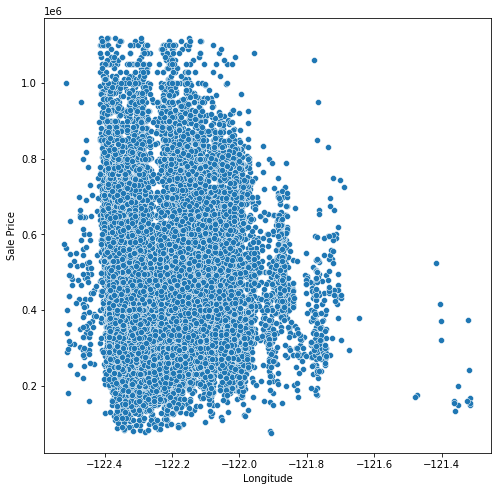

In [102]:
# Scatterplot (longitude)
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Longitude', y = "Sale Price", data = xxdf);

Latitude and Longitude are the units that represent the coordinates at geographic coordinate system. And it doesn't helps to find a price of a house. A house in any longitude or latitude can be luxurious or simple home. 
So, we will drop this column.

In [103]:
xxdf.drop(['Longitude','Latitude'], axis = 1, inplace = True)

In [104]:
xxdf.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [105]:
numerical_df.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

### n. Living Area after Renovation (in Sqft)

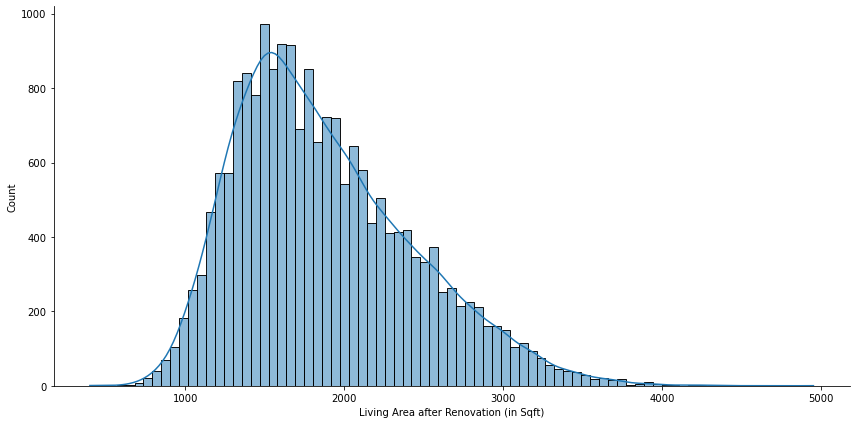

In [106]:
sns.displot(x = 'Living Area after Renovation (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

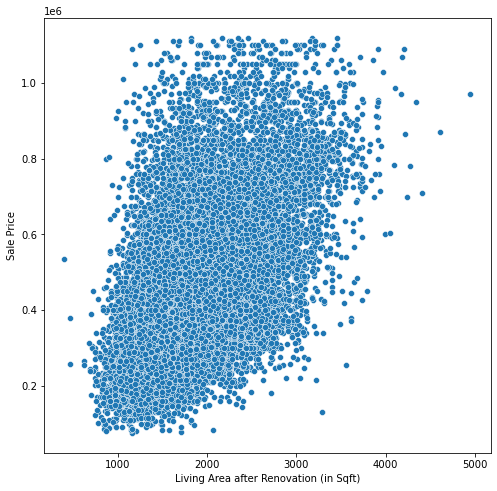

In [107]:
## let's see it's contribution to price

# Scatterplot 
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Living Area after Renovation (in Sqft)', y = "Sale Price", data = xxdf);

It's linear in nature. 

### o. Lot Area after Renovation (in Sqft)

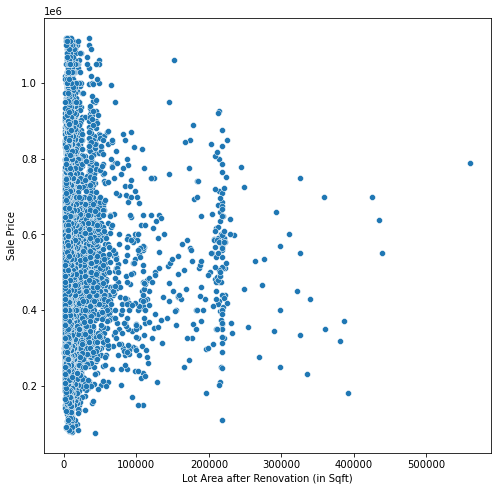

In [108]:
# Scatterplot 
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Lot Area after Renovation (in Sqft)', y = "Sale Price", data = xxdf);

We can see it has a outliers. Let's fix this.

In [109]:
xxdf = remove_outliers(xxdf, 'Lot Area after Renovation (in Sqft)')

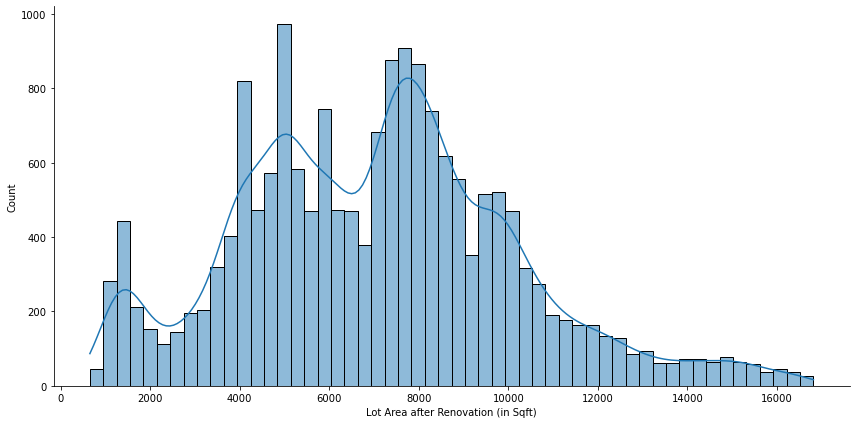

In [110]:
## is is distirution good?
# let's check

sns.displot(x = 'Lot Area after Renovation (in Sqft)', data = xxdf, aspect = 2, height = 6, kde = True);

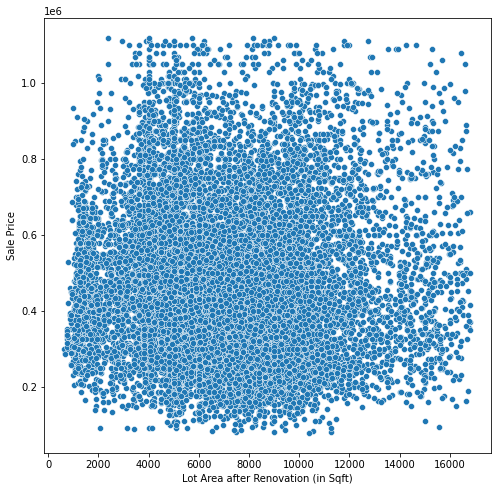

In [111]:
# After removing outliers 
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Lot Area after Renovation (in Sqft)', y = "Sale Price", data = xxdf);

In [112]:
xxdf.shape

(17975, 18)

In [113]:
cxdf = xxdf.copy()

## Categorical Features 

In [114]:
categorical_df.columns

Index(['Date House was Sold', 'Waterfront View', 'No of Times Visited',
       'Condition of the House'],
      dtype='object')

### a. Date House was sold

In [115]:
cxdf['Date House was Sold']

0         14 October 2017
1        14 December 2017
2        15 February 2016
3        14 December 2017
4        15 February 2016
               ...       
21608         14 May 2017
21609    15 February 2016
21610        14 June 2017
21611     15 January 2016
21612     14 October 2017
Name: Date House was Sold, Length: 17975, dtype: object

We don't need the exact date, let's extract the years from this column

In [116]:
cxdf.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [117]:
cxdf['New_Date_house_was_sold'] = pd.to_datetime(cxdf['Date House was Sold'])

In [118]:
cxdf['New_Date_house_was_sold']

0       2017-10-14
1       2017-12-14
2       2016-02-15
3       2017-12-14
4       2016-02-15
           ...    
21608   2017-05-14
21609   2016-02-15
21610   2017-06-14
21611   2016-01-15
21612   2017-10-14
Name: New_Date_house_was_sold, Length: 17975, dtype: datetime64[ns]

In [119]:
## Let's extract the year from it

cxdf['House_sold_year'] = cxdf['New_Date_house_was_sold'].dt.year

In [120]:
# Let's drop the "Date House was Sold" and "New_Date_house_was_sold"

In [121]:
cxdf.drop(['Date House was Sold','New_Date_house_was_sold'], axis = 1, inplace = True)

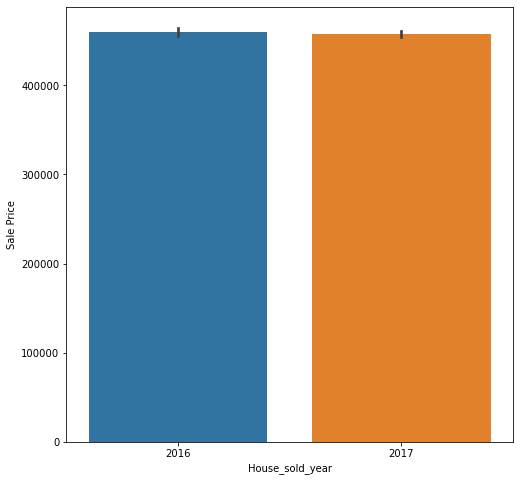

In [122]:
## Let's plot the figure

plt.figure(figsize = (8,8))
sns.barplot(x = 'House_sold_year', y = "Sale Price", data = cxdf);

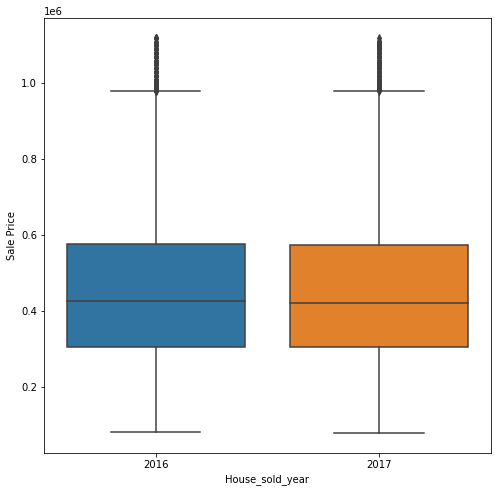

In [123]:
##

plt.figure(figsize = (8,8))
sns.boxplot(x = 'House_sold_year', y = "Sale Price", data = cxdf);

In [124]:
categorical_df.columns

Index(['Date House was Sold', 'Waterfront View', 'No of Times Visited',
       'Condition of the House'],
      dtype='object')

### b. Waterfront View

In [125]:
cxdf['Waterfront View'].value_counts()

No     17943
Yes       32
Name: Waterfront View, dtype: int64

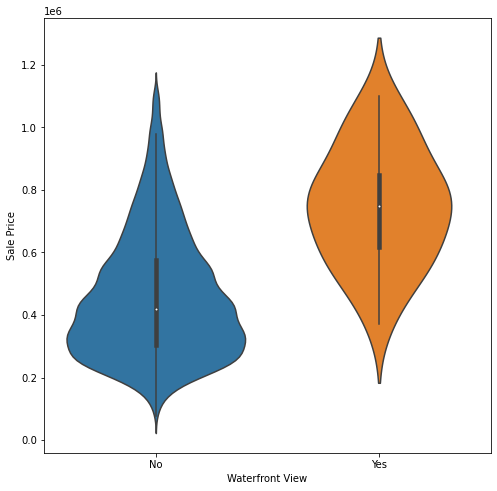

In [126]:
## let's see the bar plot


plt.figure(figsize = (8,8))
sns.violinplot(x = 'Waterfront View' , y = "Sale Price", data = cxdf);

This makes sense.

### c. No of Times Visited

In [127]:
cxdf['No of Times Visited'].value_counts()

None      16721
Twice       666
Thrice      244
Once        242
Four        102
Name: No of Times Visited, dtype: int64

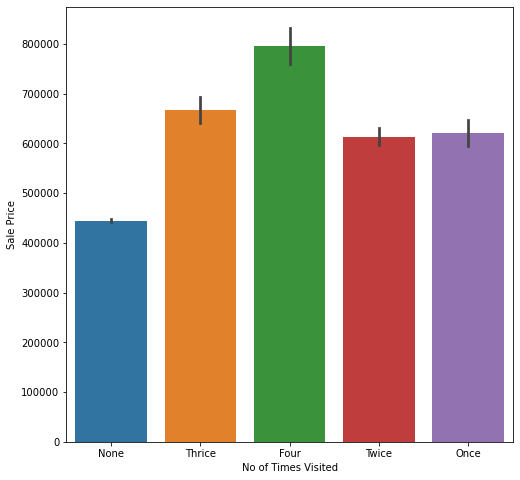

In [128]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'No of Times Visited' , y = "Sale Price", data = cxdf);

The more the number of visitors, the higher the price. Obviously, popular house will have more number of visitors and also the price. 

### d. Condition of the House

In [129]:
cxdf['Condition of the House'].isnull().sum()

0

In [130]:
cxdf['Condition of the House'].value_counts()

Fair         11608
Good          4756
Excellent     1442
Okay           143
Bad             26
Name: Condition of the House, dtype: int64

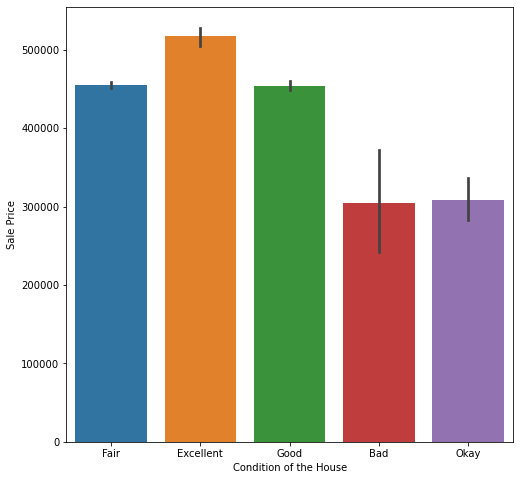

In [131]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Condition of the House' , y = "Sale Price", data = cxdf);

This is the Universal truth, Excellent house will have the higher price tag. Fair, Okay Good are similar we will combine this datas. We will keep this simple and we will change our datas into <b> Excellent </b>, <b> Good </b> and <b> Bad </b>

In [132]:
cxdf['Condition of the House'].value_counts()

Fair         11608
Good          4756
Excellent     1442
Okay           143
Bad             26
Name: Condition of the House, dtype: int64

In [133]:
cxdf['Condition of the House'] = cxdf['Condition of the House'].map({
    'Good':'Good',
    'Fair': 'Good',
    'Okay': 'Good',
    'Excellent': 'Excellent',
    'Bad':'Bad'
})

In [134]:
cxdf['Condition of the House'].value_counts()

Good         16507
Excellent     1442
Bad             26
Name: Condition of the House, dtype: int64

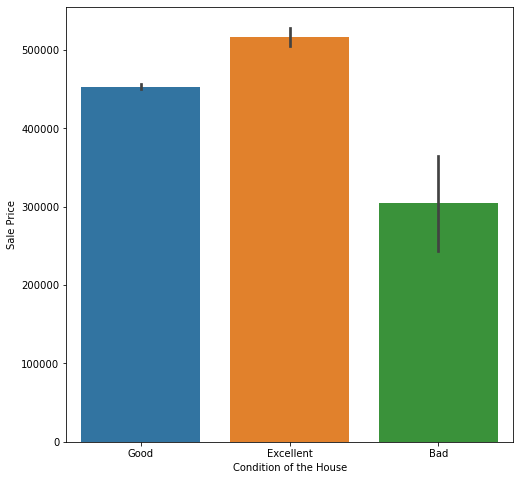

In [135]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Condition of the House' , y = "Sale Price", data = cxdf);

We have cleaned our data (Normalized, Removed Missing Values and Removed Outliers) along with visualization. Now, let's move towards the next step.

In [136]:
enc_xdf = cxdf.copy()

# 4. Model Preparation

- Encoding
- Feature Scaling
- Split Training and Testing

In [137]:
enc_xdf.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Good,7,1180.0,0,63,0,1340.0,5650,2017
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Good,7,2170.0,400,67,1991,1690.0,7639,2017
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Good,6,770.0,0,85,0,2720.0,8062,2016
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,1360.0,5000,2017
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Good,8,1680.0,0,31,0,1800.0,7503,2016


- Dropping the ID column, as it useless for predicting the price.

In [138]:
enc_xdf.drop('ID',axis = 1, inplace = True)

In [139]:
enc_xdf.select_dtypes(include = 'object')

,Waterfront View,No of Times Visited,Condition of the House
0,No,None,Good
1,No,None,Good
2,No,None,Good
3,No,None,Excellent
4,No,None,Good
...,...,...,...
21608,No,None,Good
21609,No,None,Good
21610,No,None,Good
21611,No,None,Good


In [140]:
enc_xdf['Condition of the House'].value_counts()

Good         16507
Excellent     1442
Bad             26
Name: Condition of the House, dtype: int64

In [141]:
enc_xdf['No of Times Visited'].value_counts()

None      16721
Twice       666
Thrice      244
Once        242
Four        102
Name: No of Times Visited, dtype: int64

## 4.1 Encoding 

No of Times Visited, Condition of the House we will use Label Encoding and One hot encoding for Waterfront View


In [142]:
from sklearn.preprocessing import OneHotEncoder

### a. Label Encoding

In [143]:
enc_xdf['No of Times Visited'] = enc_xdf['No of Times Visited'].map({'None': 0,
                                             'Once': 1,
                                             'Twice': 2,
                                             'Thrice': 3,
                                             'Four': 4})

In [144]:
enc_xdf['No of Times Visited'].value_counts()

0    16721
2      666
3      244
1      242
4      102
Name: No of Times Visited, dtype: int64

In [145]:
## Encoding Conditon of the house

enc_xdf['Condition of the House'].value_counts()

Good         16507
Excellent     1442
Bad             26
Name: Condition of the House, dtype: int64

In [146]:
enc_xdf['Condition of the House'] = enc_xdf['Condition of the House'].map({'Bad': 0,
                                             'Good': 1,
                                             'Excellent': 2})

In [147]:
enc_xdf['Condition of the House'].value_counts()

1    16507
2     1442
0       26
Name: Condition of the House, dtype: int64

### b. Dummy Endoing


In [148]:
enc_xdf['Waterfront View'] = pd.get_dummies(enc_xdf['Waterfront View'])

In [149]:
enc_xdf

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
0,221900.0,3,1.00,1180.0,5650.0,1.0,1,0,1,7,1180.0,0,63,0,1340.0,5650,2017
1,538000.0,3,2.25,2570.0,7242.0,2.0,1,0,1,7,2170.0,400,67,1991,1690.0,7639,2017
2,180000.0,2,1.00,770.0,10000.0,1.0,1,0,1,6,770.0,0,85,0,2720.0,8062,2016
3,604000.0,4,3.00,1960.0,5000.0,1.0,1,0,2,7,1050.0,910,53,0,1360.0,5000,2017
4,510000.0,3,2.00,1680.0,8080.0,1.0,1,0,1,8,1680.0,0,31,0,1800.0,7503,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,1,0,1,8,1530.0,0,9,0,1530.0,1509,2017
21609,400000.0,4,2.50,2310.0,5813.0,2.0,1,0,1,8,2310.0,0,4,0,1830.0,7200,2016
21610,402101.0,2,0.75,1020.0,1350.0,2.0,1,0,1,7,1020.0,0,9,0,1020.0,2007,2017
21611,400000.0,3,2.50,1600.0,2388.0,2.0,1,0,1,8,1600.0,0,14,0,1410.0,1287,2016


## 4.2 Feature Scaling

Before splitting the dataset let's scaling down all the features.

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [152]:
y = enc_xdf['Sale Price']

In [153]:
X = scaler.fit_transform(enc_xdf.drop(columns = ['Sale Price']))

In [154]:
X = pd.DataFrame(data = X, columns = enc_xdf.drop(columns = ['Sale Price']).columns)

In [155]:
X.isnull().sum()

No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
House_sold_year                              0
dtype: int64

## 4.3 Split Training and Testing

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [158]:
X_train

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
14145,0.829807,0.739295,0.693241,0.073587,0.998802,0.042231,-0.254549,-0.286765,0.628047,1.186366,-0.673090,-0.727063,-0.192915,0.788951,0.388955,0.694604
4785,0.829807,0.371234,0.389847,-0.349518,0.998802,0.042231,-0.254549,-0.286765,-0.451634,-0.294039,1.109858,1.455377,-0.192915,-0.768569,-1.044082,0.694604
7319,0.829807,0.371234,-0.050075,-0.148399,0.998802,0.042231,-0.254549,-0.286765,-0.451634,0.380368,-0.673090,-0.693487,-0.192915,-0.008351,0.193482,0.694604
17331,-2.658449,-1.469068,-1.718744,-0.508558,-0.850070,0.042231,-0.254549,-0.286765,-0.451634,-1.429017,-0.673090,-1.331431,-0.192915,-1.510245,-1.625323,0.694604
8409,-0.332945,-1.469068,-0.869240,0.095313,-0.850070,0.042231,-0.254549,3.353492,-0.451634,-0.507876,-0.673090,-0.223423,-0.192915,-0.546066,0.140407,0.694604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.829807,0.371234,0.587053,0.483982,0.998802,0.042231,-0.254549,-0.286765,1.707728,1.071223,-0.673090,-0.357727,-0.192915,1.660421,2.082192,-1.439670
11964,-0.332945,0.371234,-0.277621,0.163326,0.998802,0.042231,-0.254549,-0.286765,-0.451634,0.133633,-0.673090,-0.659911,-0.192915,-0.453356,0.870842,-1.439670
5390,0.829807,0.739295,-0.004566,0.021718,-0.850070,0.042231,-0.254549,-0.286765,0.628047,-0.228243,0.345738,0.112337,-0.192915,0.381029,0.366625,0.694604
860,0.829807,0.739295,0.207810,-0.080988,0.998802,0.042231,-0.254549,-0.286765,0.628047,0.660000,-0.673090,-1.129975,-0.192915,1.104163,-0.235329,-1.439670


# 5. Models and Evaluation Metrics
- 5.1 Linear Regression


## 5.1 Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [160]:
lr.score(X_test, y_test)

0.5634554173562099

## 5.2 LGM Regressor

In [161]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer
import math

In [162]:
lgm = LGBMRegressor(n_estimators = 40)

lgm.fit(X_train, y_train)



LGBMRegressor(n_estimators=40)

In [163]:
score = cross_val_score(lgm, X_train, y_train)

In [164]:
print(np.mean(score))

0.614316258212017


In [165]:
yp = lgm.predict(X_test)
print("R2 Score:", r2_score(y_test, yp))
print("Mean Square Error:", mean_squared_error(y_test, yp))
print("RMSE:", math.sqrt(mean_squared_error(y_test, yp)))

R2 Score: 0.6303182826466259
Mean Square Error: 14461013899.151648
RMSE: 120253.95585656069


Text(0, 0.5, 'Predicted Value')

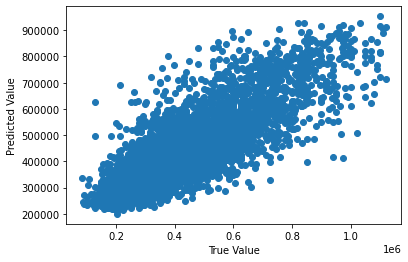

In [166]:
plt.scatter(y_test, yp)
plt.xlabel('True Value')
plt.ylabel("Predicted Value")

## XGBRegressor

In [167]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [168]:
xgb1 = XGBRegressor()
parameters = {'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 2 )

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [169]:
print(xgb_grid.best_score_)

0.5560998820001843


In [170]:
xgb_grid.best_params_

{'n_estimators': 500}

In [171]:
xgb_predict = xgb_grid.predict(X_test)

In [172]:
print("R2 score",r2_score(y_test, xgb_predict))
print("Mean Squarred Error:",mean_squared_error(y_test, xgb_predict))

R2 score 0.5973929585910966
Mean Squarred Error: 15748969311.742287


## Checking Multicollinearity and Removing it

In [173]:
m_df = enc_xdf.copy()

In [174]:
m_df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
0,221900.0,3,1.00,1180.0,5650.0,1.0,1,0,1,7,1180.0,0,63,0,1340.0,5650,2017
1,538000.0,3,2.25,2570.0,7242.0,2.0,1,0,1,7,2170.0,400,67,1991,1690.0,7639,2017
2,180000.0,2,1.00,770.0,10000.0,1.0,1,0,1,6,770.0,0,85,0,2720.0,8062,2016
3,604000.0,4,3.00,1960.0,5000.0,1.0,1,0,2,7,1050.0,910,53,0,1360.0,5000,2017
4,510000.0,3,2.00,1680.0,8080.0,1.0,1,0,1,8,1680.0,0,31,0,1800.0,7503,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,1,0,1,8,1530.0,0,9,0,1530.0,1509,2017
21609,400000.0,4,2.50,2310.0,5813.0,2.0,1,0,1,8,2310.0,0,4,0,1830.0,7200,2016
21610,402101.0,2,0.75,1020.0,1350.0,2.0,1,0,1,7,1020.0,0,9,0,1020.0,2007,2017
21611,400000.0,3,2.50,1600.0,2388.0,2.0,1,0,1,8,1600.0,0,14,0,1410.0,1287,2016


## Scaling the dataset

In [175]:
scaler = StandardScaler()
Y = m_df['Sale Price']
X = scaler.fit_transform(m_df.drop(columns =['Sale Price']))
X = pd.DataFrame(data = X, columns = m_df.drop(columns = ['Sale Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
0,-0.332945,-1.469068,-1.036107,-0.190134,-0.850070,0.042231,-0.254549,-0.286765,-0.451634,-0.688814,-0.673090,0.481673,-0.192915,-0.916904,-0.458310,0.694604
1,-0.332945,0.371234,1.072484,-0.053422,0.998802,0.042231,-0.254549,-0.286765,-0.451634,0.939632,0.345738,0.615977,5.170642,-0.267937,0.185392,0.694604
2,-1.495697,-1.469068,-1.658065,0.183420,-0.850070,0.042231,-0.254549,-0.286765,-1.531315,-1.363221,-0.673090,1.220345,-0.192915,1.641879,0.322287,-1.439670
3,0.829807,1.475416,0.147131,-0.245953,-0.850070,0.042231,-0.254549,3.353492,-0.451634,-0.902650,1.644743,0.145913,-0.192915,-0.879820,-0.668670,0.694604
4,-0.332945,0.003174,-0.277621,0.018541,-0.850070,0.042231,-0.254549,-0.286765,0.628047,0.133633,-0.673090,-0.592759,-0.192915,-0.063976,0.141378,-1.439670


In [176]:
## Removing MultiCollinearity

In [177]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
No of Bedrooms,1.000000,0.480542,0.618241,0.054161,0.130425,0.021733,0.039682,0.034978,0.308489,0.478346,0.297739,-0.152495,0.011213,0.381011,0.185743,0.009678
No of Bathrooms,0.480542,1.000000,0.692861,-0.024149,0.497369,-0.002563,0.089768,-0.021675,0.587158,0.606104,0.225137,-0.542476,0.034500,0.499208,-0.045688,0.032451
Flat Area (in Sqft),0.618241,0.692861,1.000000,0.068941,0.304998,-0.009599,0.170897,-0.003593,0.651384,0.810708,0.423632,-0.320682,0.032722,0.707186,0.187725,0.031642
Lot Area (in Sqft),0.054161,-0.024149,0.068941,1.000000,-0.132284,-0.020880,0.025992,-0.005134,-0.003208,0.049471,0.039236,0.038703,0.003732,0.091174,0.346727,-0.010553
No of Floors,0.130425,0.497369,0.304998,-0.132284,1.000000,0.001739,-0.019220,-0.122642,0.449649,0.531227,-0.310416,-0.510581,0.003316,0.233955,-0.377344,0.020460
Waterfront View,0.021733,-0.002563,-0.009599,-0.020880,0.001739,1.000000,-0.260687,-0.007106,0.006249,0.000409,-0.016749,-0.031153,-0.041209,-0.011016,-0.050212,-0.003984
No of Times Visited,0.039682,0.089768,0.170897,0.025992,-0.019220,-0.260687,1.000000,0.019530,0.130502,0.051134,0.208075,0.077215,0.063715,0.199439,0.070941,-0.003348
Condition of the House,0.034978,-0.021675,-0.003593,-0.005134,-0.122642,-0.007106,0.019530,1.000000,-0.084907,-0.091627,0.136043,0.224708,-0.030504,-0.069673,0.008283,0.049637
Overall Grade,0.308489,0.587158,0.651384,-0.003208,0.449649,0.006249,0.130502,-0.084907,1.000000,0.652737,0.083434,-0.481314,-0.006270,0.616400,0.031944,0.036033
Area of the House from Basement (in Sqft),0.478346,0.606104,0.810708,0.049471,0.531227,0.000409,0.051134,-0.091627,0.652737,1.000000,-0.186401,-0.454891,0.004067,0.675245,0.132610,0.025761


In [178]:
## pair of indpendent variables with correlation greater than 0.5

k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z, len(z)

([['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'Living Area after Renovation (in Sqft)'],
  ['Area of the House from Basement (in Sqft)', 'No of Bathrooms'],
  ['Area of the House from Basement (in Sqft)', 'Flat Area (in Sqft)'],
  ['Area of the House from Basement (in Sqft)', 'No of Floors'],
  ['Area of the House from Basement (in Sq

### Calculating VIF

In [179]:
## Importing Variance inflation_Factor from the statsmodel

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.749094
No of Bathrooms                                 2.951712
Flat Area (in Sqft)                          1901.847621
Lot Area (in Sqft)                              1.138979
No of Floors                                    2.524149
Waterfront View                                 1.081777
No of Times Visited                             1.193016
Condition of the House                          1.092187
Overall Grade                                   2.352902
Area of the House from Basement (in Sqft)    1619.197585
Basement Area (in Sqft)                       676.524135
Age of House (in Years)                         2.084485
Renovated Year                                  1.115402
Living Area after Renovation (in Sqft)          2.501150
Lot Area after Renovation (in Sqft)             1.642847
House_sold_year                                 1.005610
dtype: float64

In [180]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [181]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [182]:
for i in range(7):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),House_sold_year
0,-0.332945,-1.469068,-0.190134,-0.850070,0.042231,-0.254549,-0.286765,-0.451634,-0.688814,-0.673090,0.481673,-0.192915,-0.916904,-0.458310,0.694604
1,-0.332945,0.371234,-0.053422,0.998802,0.042231,-0.254549,-0.286765,-0.451634,0.939632,0.345738,0.615977,5.170642,-0.267937,0.185392,0.694604
2,-1.495697,-1.469068,0.183420,-0.850070,0.042231,-0.254549,-0.286765,-1.531315,-1.363221,-0.673090,1.220345,-0.192915,1.641879,0.322287,-1.439670
3,0.829807,1.475416,-0.245953,-0.850070,0.042231,-0.254549,3.353492,-0.451634,-0.902650,1.644743,0.145913,-0.192915,-0.879820,-0.668670,0.694604
4,-0.332945,0.003174,0.018541,-0.850070,0.042231,-0.254549,-0.286765,0.628047,0.133633,-0.673090,-0.592759,-0.192915,-0.063976,0.141378,-1.439670


In [183]:
## Remaining COlumns

In [184]:
## Calculating VIF for remaning columns

VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.749068
 No of Bathrooms                              2.951709
 Lot Area (in Sqft)                           1.138977
 No of Floors                                 2.524108
 Waterfront View                              1.081774
 No of Times Visited                          1.192997
 Condition of the House                       1.092171
 Overall Grade                                2.352897
 Area of the House from Basement (in Sqft)    4.239948
 Basement Area (in Sqft)                      2.087714
 Age of House (in Years)                      2.084306
 Renovated Year                               1.115393
 Living Area after Renovation (in Sqft)       2.501092
 Lot Area after Renovation (in Sqft)          1.642846
 House_sold_year                              1.005604
 dtype: float64,
 15)

## Training and Testing

In [185]:
X = vif_data
y = m_df['Sale Price']

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)



In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [192]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [188]:
predictions = lr.predict(X_test)

In [189]:
lr.score(X_test, y_test)

0.5553798569364128

In [193]:
pred = lr.predict(X_test)
score = rmse(y_test, pred)

In [194]:
score

131831.483471954